In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

2024-03-19 21:22:05.982078: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-19 21:22:06.098512: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-19 21:22:06.103014: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-03-19 21:22:06.103032: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

# Base de datos 1

In [ ]:
data = pd.read_csv('/datasets/drive/Colab Notebooks/processes2.csv')

In [ ]:
print(data.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2095 non-null   int64  
 1   name                2095 non-null   object 
 2   year                2095 non-null   int64  
 3   selling_price       2095 non-null   int64  
 4   km_driven           2095 non-null   int64  
 5   fuel                2095 non-null   object 
 6   seller_type         2095 non-null   object 
 7   transmission        2095 non-null   object 
 8   owner               2095 non-null   object 
 9   seats               2095 non-null   int64  
 10  max_power (in bph)  2095 non-null   float64
 11  Mileage Unit        2095 non-null   object 
 12  Mileage             2095 non-null   float64
 13  Engine (CC)         2095 non-null   int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 229.3+ KB
None 



In [ ]:
X = data.drop(labels=['Unnamed: 0', 'name', 'fuel', 'seller_type', 'transmission', 'owner', 'Mileage Unit', 'selling_price'], axis=1)
y = data['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

model = keras.models.Sequential([
    #primera capa cuantas neuronas, función de activación, caractaeristicas de 1 hasta donde tenga
    keras.layers.Dense(32, activation = 'relu', input_shape = X_train_sc.shape[1:]),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(1)
])

2024-03-07 19:46:52.118637: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-03-07 19:46:52.118682: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-03-07 19:46:52.118705: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-73442406-ed9f-4ce2-a4f2-ce7d02f39a9c): /proc/driver/nvidia/version does not exist
2024-03-07 19:46:52.119672: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])

In [ ]:
model.fit(X_train_sc, y_train,epochs=1000)

53/53 [==============================] - 0s 2ms/step - loss: 10603588608.0000 - mae: 73408.5859
Epoch 502/1000
53/53 [==============================] - 0s 2ms/step - loss: 10598144000.0000 - mae: 73367.0469
Epoch 503/1000
53/53 [==============================] - 0s 2ms/step - loss: 10594499584.0000 - mae: 73373.0078
Epoch 504/1000
53/53 [==============================] - 0s 2ms/step - loss: 10594489344.0000 - mae: 73363.2578
Epoch 505/1000
53/53 [==============================] - 0s 2ms/step - loss: 10592075776.0000 - mae: 73378.5000
Epoch 506/1000
53/53 [==============================] - 0s 2ms/step - loss: 10593036288.0000 - mae: 73350.3047
Epoch 507/1000
53/53 [==============================] - 0s 2ms/step - loss: 10589544448.0000 - mae: 73364.3203
Epoch 508/1000
53/53 [==============================] - 0s 2ms/step - loss: 10587573248.0000 - mae: 73342.2969
Epoch 509/1000
53/53 [==============================] - 0s 2ms/step - loss: 10584048640.0000 - mae: 73323.3984
Epoch 510/1000
5

In [ ]:
model.evaluate(X_test_sc,y_test)

14/14 [==============================] - 0s 1ms/step - loss: 10081501184.0000 - mae: 73021.3281


[10081501184.0, 73021.328125]

In [ ]:
y_pred=model.predict(X_test_sc)
print(y_pred)

14/14 [==============================] - 0s 780us/step
[[ 907103.2  ]
 [ 557114.25 ]
 [ 133182.11 ]
 [ 180643.2  ]
 [ 479857.16 ]
 [ 274977.9  ]
 [ 843739.06 ]
 [ 251270.53 ]
 [ 683819.75 ]
 [ 736473.06 ]
 [ 458937.47 ]
 [ 833485.94 ]
 [ 631073.1  ]
 [ 185290.84 ]
 [ 386441.28 ]
 [ 252008.02 ]
 [ 331244.44 ]
 [ 469973.16 ]
 [ 684598.1  ]
 [ 635091.94 ]
 [ 464877.62 ]
 [ 746881.8  ]
 [ 196065.23 ]
 [ 177979.23 ]
 [ 266305.44 ]
 [ 547154.2  ]
 [ 345883.4  ]
 [ 407670.9  ]
 [ 236168.95 ]
 [ 208971.44 ]
 [ 481085.62 ]
 [ 571842.3  ]
 [ 255145.95 ]
 [ 331647.16 ]
 [ 213494.7  ]
 [ 406651.3  ]
 [ 678049.7  ]
 [ 539359.3  ]
 [ 906696.7  ]
 [ 441613.75 ]
 [ 217978.86 ]
 [ 292728.03 ]
 [ 513867.88 ]
 [ 397945.22 ]
 [ 615387.3  ]
 [ 325431.97 ]
 [ 321249.34 ]
 [ 250530.44 ]
 [ 430198.5  ]
 [ 168617.05 ]
 [ 730316.2  ]
 [ 451085.66 ]
 [ 569996.44 ]
 [ 188951.53 ]
 [ 428688.97 ]
 [ 578193.7  ]
 [ 412171.72 ]
 [ 398889.9  ]
 [ 340139.1  ]
 [ 167126.86 ]
 [ 191566.5  ]
 [ 623508.56 ]
 [ 227325.62 ]


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                224       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________


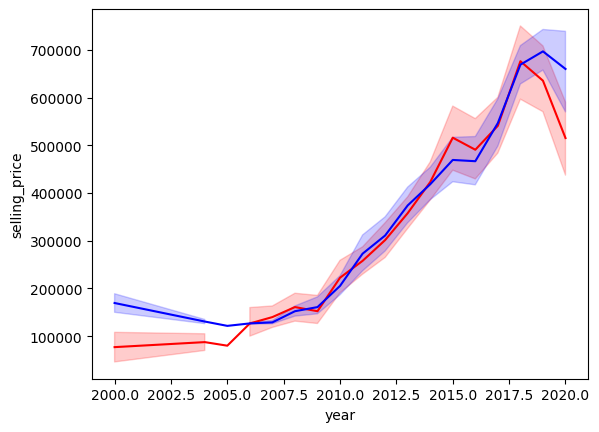

In [ ]:
sns.lineplot(data=X_test,x='year',y=y_test,c='r')
sns.lineplot(data=X_test,x='year',y=y_pred.ravel(),c='b')
plt.show()

# Base de datos 2

In [ ]:
data = pd.read_csv('/datasets/drive/Colab Notebooks/ToyotaCorolla.csv')

In [ ]:
print(data.isnull().sum(), '\n') #Revisar la cantidad de datos nulos

Price                 0
KM                    0
Fuel_Type            17
Automatic             0
CC                    0
Doors                 0
Cylinders             0
Guarantee_Period      0
Boardcomputer         0
Powered_Windows       0
Sport_Model           0
Metallic_Rim          0
Parking_Assistant     0
Tow_Bar               0
dtype: int64 



In [ ]:
print(data.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 1436 non-null   int64 
 1   Model              1436 non-null   object
 2   Price              1436 non-null   int64 
 3   Age_08_04          1436 non-null   int64 
 4   Mfg_Month          1436 non-null   int64 
 5   Mfg_Year           1436 non-null   int64 
 6   KM                 1436 non-null   int64 
 7   Fuel_Type          1436 non-null   object
 8   HP                 1436 non-null   int64 
 9   Met_Color          1436 non-null   int64 
 10  Color              1436 non-null   object
 11  Automatic          1436 non-null   int64 
 12  CC                 1436 non-null   int64 
 13  Doors              1436 non-null   int64 
 14  Cylinders          1436 non-null   int64 
 15  Gears              1436 non-null   int64 
 16  Quarterly_Tax      1436 non-null   int64 


In [ ]:
print(f'Número de filas: {data.shape[0]}, Número de columnas: {data.shape[1]}') #Número de filas y columnas
data.head(1400) #Visualización del dataset

Número de filas: 1419, Número de columnas: 17


,Price,KM,Fuel_Type,HP,Automatic,CC,Doors,Cylinders,Guarantee_Period,Airbag_2,Boardcomputer,Powered_Windows,Power_Steering,Sport_Model,Metallic_Rim,Parking_Assistant,Tow_Bar
0,13500,46986,1,90,0,2000,3,4,3,1,1,1,1,0,0,0,0
1,13750,72937,1,90,0,2000,3,4,3,1,1,0,1,0,0,0,0
2,13950,41711,1,90,0,2000,3,4,3,1,1,0,1,0,0,0,0
3,14950,48000,1,90,0,2000,3,4,3,1,1,0,1,0,0,0,0
4,13750,38500,1,90,0,2000,3,4,3,1,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412,9950,42800,0,110,0,1600,3,4,3,1,0,0,1,1,0,0,0
1413,8750,42317,0,107,1,1600,5,4,3,0,0,0,1,0,0,0,1
1414,7500,42186,0,110,0,1600,3,4,3,0,0,0,1,0,0,0,1
1415,6950,42000,0,110,0,1600,3,4,3,1,0,0,1,1,0,0,0


In [ ]:
data['Fuel_Type'] = data['Fuel_Type'].replace({'Diesel': 1, 'Petrol': 0})
data = data[data['Fuel_Type']!='CNG'] #Eliminar edades negativas
data['Fuel_Type'] = pd.to_numeric(data['Fuel_Type'], errors='raise')

In [ ]:
data = data.drop(['Id',
                'Model',
                'Age_08_04',
                'Mfg_Month',
                'Mfg_Year',
                'Met_Color', 
                'Color',
                'Quarterly_Tax', 
                'Weight', 
                'BOVAG_Guarantee', 
                'Mfr_Guarantee', 
                'ABS', 
                'Airbag_1',
                'Airco',
                'Automatic_airco',
                'Gears',
                'Radio',
                'CD_Player',
                'Central_Lock',
                'Mistlamps',
                'Backseat_Divider',
                'Radio_cassette',
                ], axis=1)

In [ ]:
#Tipos de datos
categorical_data = data.select_dtypes(include=object)
print(categorical_data.columns)
numeric_data = data.select_dtypes(include=np.number)
print(numeric_data.columns)

Index([], dtype='object')
Index(['Price', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'CC', 'Doors',
       'Cylinders', 'Guarantee_Period', 'Airbag_2', 'Boardcomputer',
       'Powered_Windows', 'Power_Steering', 'Sport_Model', 'Metallic_Rim',
       'Parking_Assistant', 'Tow_Bar'],
      dtype='object')


In [ ]:
X = data.drop('Price', axis=1)
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

model = keras.models.Sequential([
    #primera capa cuantas neuronas, función de activación, caractaeristicas de 1 hasta donde tenga
    keras.layers.Dense(32, activation = 'relu', input_shape = X_train_sc.shape[1:]),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(8,activation='relu'),
    keras.layers.Dense(1)
])

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])

In [ ]:
model.fit(X_train_sc, y_train,epochs=300)

Epoch 1/300
36/36 [==============================] - 0s 1ms/step - loss: 128488912.0000 - mae: 10744.2852
Epoch 2/300
36/36 [==============================] - 0s 2ms/step - loss: 128445192.0000 - mae: 10742.2930
Epoch 3/300
36/36 [==============================] - 0s 3ms/step - loss: 128325520.0000 - mae: 10736.8857
Epoch 4/300
36/36 [==============================] - 0s 1ms/step - loss: 127996080.0000 - mae: 10722.4385
Epoch 5/300
36/36 [==============================] - 0s 939us/step - loss: 127182536.0000 - mae: 10687.3984
Epoch 6/300
36/36 [==============================] - 0s 2ms/step - loss: 125493760.0000 - mae: 10616.2383
Epoch 7/300
36/36 [==============================] - 0s 2ms/step - loss: 122450264.0000 - mae: 10487.3838
Epoch 8/300
36/36 [==============================] - 0s 902us/step - loss: 117496096.0000 - mae: 10276.0928
Epoch 9/300
36/36 [==============================] - 0s 2ms/step - loss: 110252728.0000 - mae: 9958.5547
Epoch 10/300
36/36 [=======================

In [ ]:
model.evaluate(X_test_sc,y_test)

9/9 [==============================] - 0s 899us/step - loss: 2500231.0000 - mae: 1250.0295


[2500231.0, 1250.029541015625]

In [ ]:
y_pred=model.predict(X_test_sc)
print(y_pred)

9/9 [==============================] - 0s 803us/step
[[ 7182.9795]
 [ 9512.468 ]
 [ 5346.926 ]
 [19103.646 ]
 [19162.037 ]
 [ 8514.539 ]
 [13192.591 ]
 [18224.5   ]
 [ 8184.5845]
 [10118.749 ]
 [ 8969.282 ]
 [ 9568.808 ]
 [ 9119.611 ]
 [16201.413 ]
 [ 8352.235 ]
 [10886.799 ]
 [12272.062 ]
 [10545.366 ]
 [13296.716 ]
 [ 7722.788 ]
 [23182.568 ]
 [ 8704.668 ]
 [13172.553 ]
 [12703.853 ]
 [15355.224 ]
 [12748.978 ]
 [ 7530.0903]
 [10248.595 ]
 [10669.026 ]
 [ 7759.612 ]
 [18755.38  ]
 [ 9335.097 ]
 [10436.919 ]
 [ 9667.093 ]
 [ 9667.985 ]
 [ 8293.978 ]
 [14106.8   ]
 [ 9706.818 ]
 [10548.492 ]
 [11111.554 ]
 [10208.198 ]
 [11635.383 ]
 [11584.315 ]
 [11409.995 ]
 [17332.643 ]
 [ 9485.142 ]
 [10440.755 ]
 [13505.099 ]
 [ 8668.268 ]
 [ 8548.958 ]
 [ 8308.282 ]
 [ 8893.265 ]
 [ 8889.059 ]
 [10460.182 ]
 [12788.651 ]
 [10805.329 ]
 [ 7653.014 ]
 [ 8026.44  ]
 [12806.587 ]
 [11918.381 ]
 [19240.33  ]
 [ 9808.704 ]
 [ 9758.692 ]
 [15044.143 ]
 [10351.453 ]
 [13955.773 ]
 [10987.635 ]
 [ 6247.4

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 32)                544       
                                                                 
 dense_17 (Dense)            (None, 16)                528       
                                                                 
 dense_18 (Dense)            (None, 8)                 136       
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,217
Trainable params: 1,217
Non-trainable params: 0
_________________________________________________________________


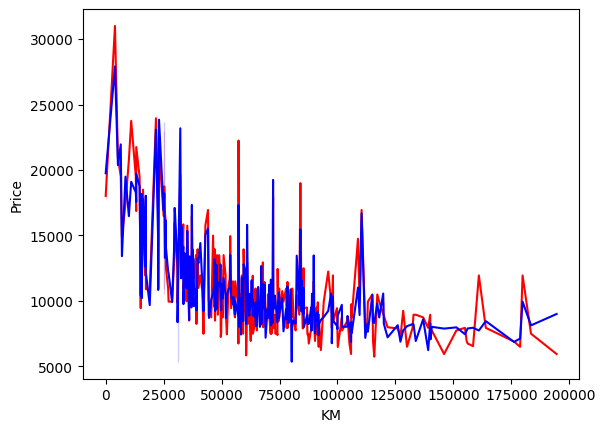

In [ ]:
sns.lineplot(data=X_test,x='KM',y=y_test,c='r')
sns.lineplot(data=X_test,x='KM',y=y_pred.ravel(),c='b')
plt.show()

# Base de datos 3

In [ ]:
data = pd.read_csv('/datasets/drive/Colab Notebooks/train_and_test2.csv')

In [ ]:
print(data.isnull().sum(), '\n') #Revisar la cantidad de datos nulos

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       0
zero.17        0
zero.18        0
2urvived       0
dtype: int64 



In [ ]:
data = data.dropna()

In [ ]:
print(data.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

In [ ]:
data = data[['Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass', 'Embarked', '2urvived']]

In [ ]:
X = data.drop('2urvived', axis=1)
y = data['2urvived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

model = keras.models.Sequential([
    #primera capa cuantas neuronas, función de activación, caractaeristicas de 1 hasta donde tenga
    keras.layers.Dense(32, activation = 'relu', input_shape = X_train_sc.shape[1:]),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(8,activation='sigmoid'),
    keras.layers.Dense(1)
])

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train_sc, y_train,epochs=100)

Epoch 1/100
33/33 [==============================] - 1s 2ms/step - loss: 3.9706 - accuracy: 0.7426
Epoch 2/100
33/33 [==============================] - 0s 3ms/step - loss: 3.9706 - accuracy: 0.7426
Epoch 3/100
33/33 [==============================] - 0s 2ms/step - loss: 3.9706 - accuracy: 0.7426
Epoch 4/100
33/33 [==============================] - 0s 2ms/step - loss: 3.9706 - accuracy: 0.7426
Epoch 5/100
33/33 [==============================] - 0s 3ms/step - loss: 3.9706 - accuracy: 0.7426
Epoch 6/100
33/33 [==============================] - 0s 2ms/step - loss: 3.9706 - accuracy: 0.7426
Epoch 7/100
33/33 [==============================] - 0s 2ms/step - loss: 3.9706 - accuracy: 0.7426
Epoch 8/100
33/33 [==============================] - 0s 2ms/step - loss: 3.9706 - accuracy: 0.7426
Epoch 9/100
33/33 [==============================] - 0s 4ms/step - loss: 3.9706 - accuracy: 0.7426
Epoch 10/100
33/33 [==============================] - 0s 1ms/step - loss: 3.9706 - accuracy: 0.7426
Epoch 11/

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Precisión del modelo: {accuracy*100:.2f}%')

Precisión del modelo: 72.90%


In [ ]:
y_pred=model.predict(X_test_sc)
y_pred_ = []
for y in y_pred:
    y[0] = y[0] * -1
    if y[0] >= 0.5:
        y[0] = 1
    else:
        y[0] = 0 
    y_pred_.append(y[0])
y_pred = y_pred_
print(y_pred)

9/9 [==============================] - 0s 3ms/step
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [ ]:
model.summary()

([<matplotlib.axis.XTick at 0x7fd7457800d0>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

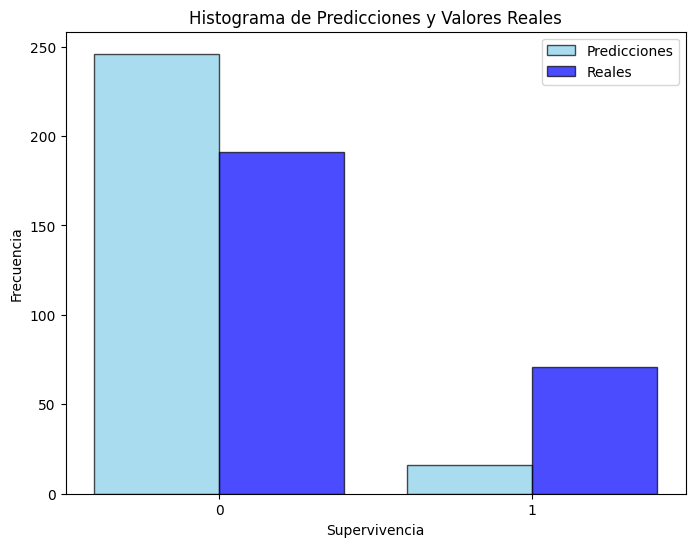

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist([y_pred, y_test], bins=[-0.5, 0.5, 1.5], color=['skyblue', 'blue'], edgecolor='black', alpha=0.7, label=['Predicciones', 'Reales'])
plt.xlabel('Supervivencia')
plt.ylabel('Frecuencia')
plt.title('Histograma de Predicciones y Valores Reales')
plt.legend()
plt.xticks([0, 1])

# Base de datos 4

In [ ]:
data = pd.read_csv('/datasets/drive/Colab Notebooks/customer_churn.csv')

In [ ]:
print(data.isnull().sum(), '\n') #Revisar la cantidad de datos nulos

Names              0
Age                0
Total_Purchase     0
Account_Manager    0
Years              0
Num_Sites          0
Onboard_date       0
Location           0
Company            0
Churn              0
dtype: int64 



In [ ]:
print(data.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Names            900 non-null    object 
 1   Age              900 non-null    float64
 2   Total_Purchase   900 non-null    float64
 3   Account_Manager  900 non-null    int64  
 4   Years            900 non-null    float64
 5   Num_Sites        900 non-null    float64
 6   Onboard_date     900 non-null    int64  
 7   Location         900 non-null    object 
 8   Company          900 non-null    object 
 9   Churn            900 non-null    int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 70.4+ KB
None 



In [ ]:
print(f'Número de filas: {data.shape[0]}, Número de columnas: {data.shape[1]}') #Número de filas y columnas
data.head(1400) #Visualización del dataset

Número de filas: 900, Número de columnas: 6


,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
0,42.0,11066.80,0,7.22,8.0,1
1,41.0,11916.22,0,6.50,11.0,1
2,38.0,12884.75,0,6.67,12.0,1
3,42.0,8010.76,0,6.71,10.0,1
4,37.0,9191.58,0,5.56,9.0,1
...,...,...,...,...,...,...
895,42.0,12800.82,1,3.62,8.0,0
896,52.0,9893.92,0,6.91,7.0,0
897,45.0,12056.18,0,5.46,4.0,0
898,51.0,6517.93,1,5.47,10.0,0


In [ ]:
data = data.drop(['Names',
                'Location',
                'Company',
                'Onboard_date'
                ], axis=1)

In [ ]:
X = data.drop('Churn', axis=1)
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

model = keras.models.Sequential([
    #primera capa cuantas neuronas, función de activación, caractaeristicas de 1 hasta donde tenga
    keras.layers.Dense(16, activation = 'relu', input_shape = X_train_sc.shape[1:]),
    keras.layers.Dense(8,activation='relu'),
    keras.layers.Dense(4,activation='sigmoid'),
    keras.layers.Dense(1)
])

In [ ]:
model.compile(optimizer='adamax',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train_sc, y_train,epochs=1000)

22/22 [==============================] - 0s 3ms/step - loss: 2.6965 - accuracy: 0.8252
Epoch 502/1000
22/22 [==============================] - 0s 864us/step - loss: 2.6965 - accuracy: 0.8252
Epoch 503/1000
22/22 [==============================] - 0s 3ms/step - loss: 2.6965 - accuracy: 0.8252
Epoch 504/1000
22/22 [==============================] - 0s 901us/step - loss: 2.6965 - accuracy: 0.8252
Epoch 505/1000
22/22 [==============================] - 0s 1ms/step - loss: 2.6965 - accuracy: 0.8252
Epoch 506/1000
22/22 [==============================] - 0s 3ms/step - loss: 2.6965 - accuracy: 0.8252
Epoch 507/1000
22/22 [==============================] - 0s 993us/step - loss: 2.6965 - accuracy: 0.8252
Epoch 508/1000
22/22 [==============================] - 0s 3ms/step - loss: 2.6965 - accuracy: 0.8252
Epoch 509/1000
22/22 [==============================] - 0s 921us/step - loss: 2.6965 - accuracy: 0.8252
Epoch 510/1000
22/22 [==============================] - 0s 887us/step - loss: 2.6965 - ac

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Precisión del modelo: {accuracy*100:.2f}%')

8/8 [==============================] - 0s 991us/step - loss: 2.7406 - accuracy: 0.7422
Precisión del modelo: 74.22%


In [ ]:
y_pred = model.predict(X_test_sc)
decision = roc_auc_score(y_test, y_pred)
y_pred_ = []
for y in y_pred:
    y[0] = y[0] * -1
    if y[0] >= decision:
        y[0] = 1
    else:
        y[0] = 0 
    y_pred_.append(y[0])
y_pred = y_pred_

8/8 [==============================] - 0s 742us/step


In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 6)                 36        
                                                                 
 dense_37 (Dense)            (None, 4)                 28        
                                                                 
 dense_38 (Dense)            (None, 2)                 10        
                                                                 
 dense_39 (Dense)            (None, 1)                 3         
                                                                 
Total params: 77
Trainable params: 77
Non-trainable params: 0
_________________________________________________________________


([<matplotlib.axis.XTick at 0x7fa37d3b83d0>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

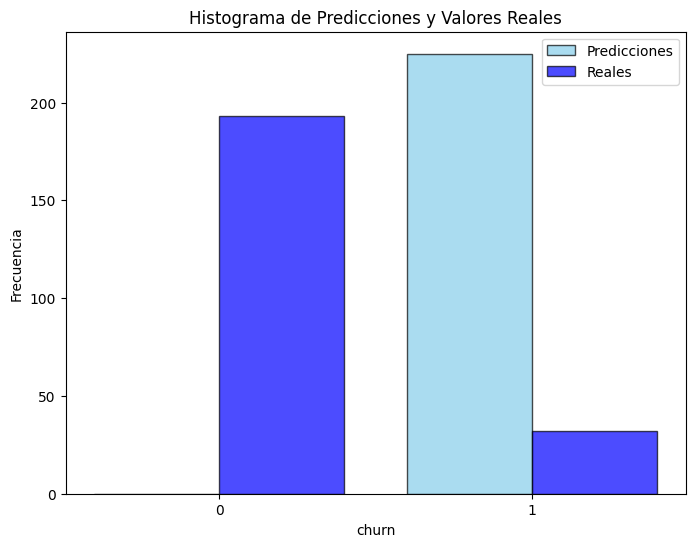

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist([y_pred, y_test], bins=[-0.5, 0.5, 1.5], color=['skyblue', 'blue'], edgecolor='black', alpha=0.7, label=['Predicciones', 'Reales'])
plt.xlabel('churn')
plt.ylabel('Frecuencia')
plt.title('Histograma de Predicciones y Valores Reales')
plt.legend()
plt.xticks([0, 1])

In [ ]:
print(confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

[[193   0]
 [ 32   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       193
           1       0.00      0.00      0.00        32

    accuracy                           0.86       225
   macro avg       0.43      0.50      0.46       225
weighted avg       0.74      0.86      0.79       225

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier